In [1]:
from deepface import DeepFace

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
im1_path = "Dataset/SplitData/val/images/17017554403279805.jpg"
im2_path = "Dataset/SplitData/val/images/17017554377959993.jpg"
im3_path = "Dataset/SplitData/val/images/17017553785888524.jpg"

In [4]:
img1 = cv2.imread(im1_path)
img2 = cv2.imread(im2_path)
img3 = cv2.imread(im3_path)

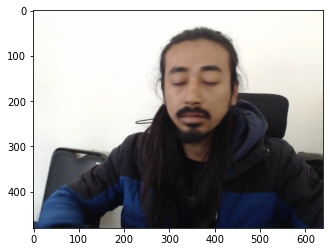

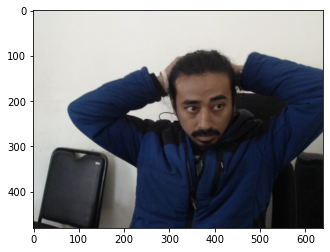

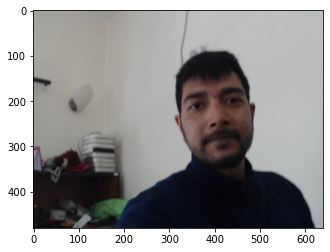

In [5]:
plt.imshow(img1[:,:,::-1])
plt.show()
plt.imshow(img2[:,:,::-1])
plt.show()
plt.imshow(img3[:,:,::-1])
plt.show()

In [6]:
result = DeepFace.verify(img1_path = im1_path, img2_path = im2_path, model_name = "VGG-Face")

In [7]:
result

{'verified': True,
 'distance': 0.2223400856692449,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 256, 'y': 75, 'w': 202, 'h': 202},
  'img2': {'x': 302, 'y': 150, 'w': 156, 'h': 156}},
 'time': 5.27}

In [8]:
result1 = DeepFace.verify(img1_path = im1_path, img2_path = im3_path, model_name = "VGG-Face")
result1

{'verified': True,
 'distance': 0.3159126139251257,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 256, 'y': 75, 'w': 202, 'h': 202},
  'img2': {'x': 300, 'y': 127, 'w': 201, 'h': 201}},
 'time': 0.19}

In [9]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]

metrics = ["cosine", "euclidean", "euclidean_l2"]


#face verification
result = DeepFace.verify(img1_path = im1_path, 
      img2_path = im2_path, 
      model_name = models[2],
     distance_metric = metrics[2]
)
result

{'verified': True,
 'distance': 0.6020047264427257,
 'threshold': 1.04,
 'model': 'Facenet512',
 'detector_backend': 'opencv',
 'similarity_metric': 'euclidean_l2',
 'facial_areas': {'img1': {'x': 256, 'y': 75, 'w': 202, 'h': 202},
  'img2': {'x': 302, 'y': 150, 'w': 156, 'h': 156}},
 'time': 2.78}

In [56]:
path = "/home/prixa-ml/Desktop/projects/liveness-detection/Face-Recognition/spoof_or_not/WhatsApp Image 2023-12-06 at 13.28.20.jpeg"
objs = DeepFace.analyze(img_path = path, 
        actions = ['age', 'gender', 'race', 'emotion']
)

Action: emotion: 100%|█████████████████| 4/4 [00:00<00:00, 19.77it/s]


In [57]:
objs

[{'age': 31,
  'region': {'x': 256, 'y': 525, 'w': 167, 'h': 167},
  'gender': {'Woman': 0.5649800412356853, 'Man': 99.4350254535675},
  'dominant_gender': 'Man',
  'race': {'asian': 47.70298884528809,
   'indian': 5.299837830653061,
   'black': 1.29092063998703,
   'white': 20.4177719603641,
   'middle eastern': 4.524392159246931,
   'latino hispanic': 20.76409135842868},
  'dominant_race': 'asian',
  'emotion': {'angry': 1.2099947707844446e-14,
   'disgust': 1.0970757523797291e-19,
   'fear': 4.1653243354478064e-09,
   'happy': 99.99998807907104,
   'sad': 5.931769919698127e-06,
   'surprise': 2.1504656926168776e-16,
   'neutral': 8.523749528421831e-06},
  'dominant_emotion': 'happy'}]

In [1]:
import math
import time

import cv2
import cvzone
from ultralytics import YOLO
from deepface import DeepFace




confidence = 0.6

cap = cv2.VideoCapture(0)  # For Webcam
cap.set(3, 640)
cap.set(4, 480)
# cap = cv2.VideoCapture("../Videos/motorbikes.mp4")  # For Video


# model = YOLO("../models/l_version_1_300.pt")

model = YOLO("runs/detect/train5/weights/last.pt")



classNames = ["fake", "real"]

prev_frame_time = 0
new_frame_time = 0

img_path = "Dataset/SplitData/val/images/17017554403279805.jpg"

models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]

metrics = ["cosine", "euclidean", "euclidean_l2"]

im1_path = "Dataset/SplitData/val/images/17017554403279805.jpg"
im2_path = "Dataset/SplitData/val/images/17017554377959993.jpg"
result = DeepFace.verify(img1_path=im1_path,
                                img2_path=im2_path,
                                model_name=models[2],
                                distance_metric=metrics[2])


while True:
    new_frame_time = time.time()
    success, img = cap.read()
    results = model(img, stream=True, verbose=False)
    for r in results:
        boxes = r.boxes
        for box in boxes:
            # Bounding Box
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            # cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,255),3)
            w, h = x2 - x1, y2 - y1
            # Confidence
            conf = math.ceil((box.conf[0] * 100)) / 100
            # Class Name
            cls = int(box.cls[0])
            if conf > confidence:
                
                if classNames[cls] == 'real':
                    color = (0,255, 0 )
                    # Extract the detected face region
                    face_img = img[y1:y2, x1:x2]

                    # Save the detected face temporarily (you may choose a different path)
                    

                    # cv2.imwrite(temp_face_path, face_img)

                    # # Perform face verification
                    

                    # Display the verification result
                    match_text = "Match" 
                    # if result['verified'] else "No Match"
                    cvzone.putTextRect(img, match_text, (x1, y1 - 10),
                                       scale=1.5, thickness=3, colorR=color)

                else:
                    color = (0, 0, 255)

                cvzone.cornerRect(img, (x1, y1, w, h),colorC=color,colorR=color)
                # cvzone.putTextRect(img, f'{classNames[cls].upper()} {int(conf*100)}%',
                #                    (max(0, x1), max(35, y1)), scale=2, thickness=4,colorR=color,
                #                    colorB=color)


    fps = 1 / (new_frame_time - prev_frame_time)
    prev_frame_time = new_frame_time
    print(fps)

    cv2.imshow("Image", img)
    cv2.waitKey(1)

InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version

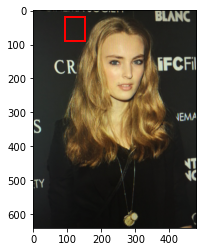

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

def draw_bounding_box(image_path, yolo_txt_path):
    # Open the image
    with Image.open(image_path) as img:
        # Image dimensions
        img_width, img_height = img.size

        # Read YOLO format data from the txt file
        with open(yolo_txt_path, 'r') as file:
            data = file.read().split()
        
        # Extract bounding box details
        _, center_x, center_y, width, height = map(float, data)

        # Convert to pixel coordinates
        box_width = width * img_width
        box_height = height * img_height
        left = (center_x * img_width) - (box_width / 2)
        top = (center_y * img_height) - (box_height / 2)

        # Create figure and axes
        fig, ax = plt.subplots()

        # Display the image
        ax.imshow(img)

        # Create a Rectangle patch
        rect = patches.Rectangle((left, top), box_width, box_height, linewidth=2, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

        plt.show()

# Example usage
draw_bounding_box('Dataset/all/494443.png', 'Dataset/all/494443.txt')

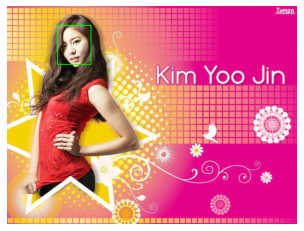

In [34]:
import cv2
from matplotlib import pyplot as plt

# Function to convert YOLO format to bounding box coordinates
def yolo_to_bbox(yolo_data, img_width, img_height):
    class_id, x_center, y_center, width, height = yolo_data
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height
    x_top_left = int(x_center - (width / 2))
    y_top_left = int(y_center - (height / 2))
    return x_top_left, y_top_left, int(width), int(height)

# Load the image
image_path = 'Dataset/all/496100.png'  # Replace with your image path
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Image could not be read.")
img_height, img_width = image.shape[:2]

# Load the YOLO formatted bounding box
yolo_path = 'Dataset/all/496100.txt'  # Replace with your YOLO bbox file path
with open(yolo_path, 'r') as file:
    yolo_data = [float(x) for x in file.readline().split()]

# Convert YOLO format to bounding box coordinates
x_top_left, y_top_left, width, height = yolo_to_bbox(yolo_data, img_width, img_height)

# Draw the bounding box on the image
cv2.rectangle(image, (x_top_left, y_top_left), (x_top_left + width, y_top_left + height), (0, 255, 0), 2)

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with the bounding box
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


Image size: 3499x4116
Bounding Box: x_min=81.0, y_min=20.0, x_max=34.0, y_max=41.0, probability=0.99778736


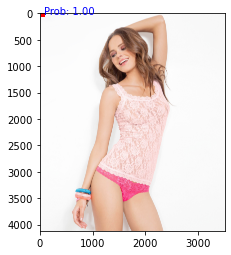

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

def draw_bounding_box(image_path, yolo_txt_path):
    # Open the image
    with Image.open(image_path) as img:
        # Image dimensions
        img_width, img_height = img.size
        print(f"Image size: {img_width}x{img_height}")

        # Read YOLO format data from the txt file
        with open(yolo_txt_path, 'r') as file:
            data = file.read().split()
        
        # Extract bounding box details and class probability
        x_min, y_min, x_max, y_max, probability = map(float, data)

        # Print the bounding box details for debugging
        print(f"Bounding Box: x_min={x_min}, y_min={y_min}, x_max={x_max}, y_max={y_max}, probability={probability}")

        # Convert to pixel coordinates
        left = x_min
        top = y_min
        box_width = x_max - x_min
        box_height = y_max - y_min

        # Create figure and axes
        fig, ax = plt.subplots()

        # Display the image
        ax.imshow(img)

        # Create a Rectangle patch
        rect = patches.Rectangle((left, top), box_width, box_height, linewidth=2, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

        # Optional: Display the class probability
        plt.text(left, top, f'Prob: {probability:.2f}', color='blue', fontsize=10)

        plt.show()

# Example usage
draw_bounding_box('Dataset/Data/test/10001/live/496120.png', 'Dataset/Data/test/10001/live/496120_BB.txt')


Original image dimensions: (4116, 3499, 3)
Scaled bounding box: (1265, 367, 531, 753)


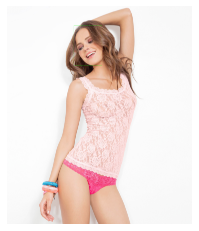

In [30]:
import cv2
from matplotlib import pyplot as plt

def draw_bbox(image_path, bbox_path, standard_size=(224, 224)):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image could not be read.")
    print(f"Original image dimensions: {image.shape}")

    # Read the bounding box coordinates from the file
    with open(bbox_path, 'r') as f:
        bbox_data = f.readline().strip().split()
    x, y, w, h = map(int, bbox_data[:4])

    # Calculate scale factors
    image_height, image_width = image.shape[:2]
    x_scale = image_width / standard_size[0]
    y_scale = image_height / standard_size[1]

    # Scale the bounding box coordinates
    x_scaled = int(x * x_scale)
    y_scaled = int(y * y_scale)
    w_scaled = int(w * x_scale)
    h_scaled = int(h * y_scale)
    print(f"Scaled bounding box: {(x_scaled, y_scaled, w_scaled, h_scaled)}")

    # Draw the scaled bounding box on the image
    cv2.rectangle(image, (x_scaled, y_scaled), (x_scaled + w_scaled, y_scaled + h_scaled), (0, 255, 0), 2)

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with the bounding box
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

# Replace these paths with the actual paths to your files
image_path = 'Dataset/Data/test/10001/live/496120.png'
bbox_path = 'Dataset/Data/test/10001/live/496120_BB.txt'

# Run the function
draw_bbox(image_path, bbox_path)


Original image dimensions: (500, 376, 3)
Scaled bounding box: (117, 55, 139, 218)
Image with bounding box saved to output.png


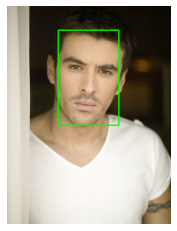

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def draw_bbox_and_save(image_path, bbox_path, output_path, standard_size=(224, 224)):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image could not be read.")
    print(f"Original image dimensions: {image.shape}")

    # Read the bounding box coordinates from the file
    with open(bbox_path, 'r') as f:
        bbox_data = f.readline().strip().split()
    x, y, w, h = map(int, bbox_data[:4])

    # Calculate scale factors
    image_height, image_width = image.shape[:2]
    x_scale = image_width / standard_size[0]
    y_scale = image_height / standard_size[1]

    # Scale the bounding box coordinates
    x_scaled = int(x * x_scale)
    y_scaled = int(y * y_scale)
    w_scaled = int(w * x_scale)
    h_scaled = int(h * y_scale)
    print(f"Scaled bounding box: {(x_scaled, y_scaled, w_scaled, h_scaled)}")

    # Draw the scaled bounding box on the image
    cv2.rectangle(image, (x_scaled, y_scaled), (x_scaled + w_scaled, y_scaled + h_scaled), (0, 255, 0), 2)

    # Save the image with the bounding box
    cv2.imwrite(output_path, image)
    print(f"Image with bounding box saved to {output_path}")

    # Display the image with the bounding box
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Replace these paths with the actual paths to your files
image_path = 'Dataset/Data/test/10027/live/497032.png'
bbox_path = 'Dataset/Data/test/10027/live/497032_BB.txt'
output_path = 'output.png'

# Run the function
draw_bbox_and_save(image_path, bbox_path, output_path)